In [1]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.1.1-cp38-cp38-win_amd64.whl (7.3 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wordcloud 1.8.1 requires matplotlib, which is not installed.
visions 0.7.4 requires networkx>=2.4, which is not installed.
visions 0.7.4 requires pandas>=0.25.3, which is not installed.
tensorflow 2.8.0 requires h5py>=2.9.0, which is not installed.
tensorflow 2.8.0 requires wrapt>=1.11.0, which is not installed.
tensorboard 2.8.0 requires werkzeug>=0.11.15, which is not installed.
phik 0.12.0 requires matplotlib>=2.2.3, which is not installed.
phik 0.12.0 requires pandas>=0.25.1, which is not installed.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, which is not installed.
pandas-profiling 3.1.0 requires pandas!=1.0.0,!=1.0.1,!=1.0.2,!=1.1.0,>=0.25.3, which is not installed.
pandas-profiling 3.1.0 requires seaborn>=0.10.1, which is not installed.
missingno 0.5.1 requires matplotlib, which is not installed.
mis

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import

In [5]:
dataframe = pd.read_csv('dataframe_cleaned.csv')

In [6]:
dataframe

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7028,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7029,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7030,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Trying Classifier Models

### Train Test Split with One Hot Encoder

In [7]:
X = dataframe.drop(['Churn'],axis=1)
Y = dataframe['Churn']

In [8]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
X_transformed = one_hot_encoder.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=100)

### SVC

In [10]:
from sklearn import svm
svc = svm.SVC(random_state=100)
svc.fit(X_train, Y_train)
score_svc = svc.score(X_test,Y_test)
print('score_svc:',score_svc)

score_svc: 0.7860696517412935


### Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=100)
decision_tree_classifier.fit(X_train, Y_train)
score_decision_tree_classifier = decision_tree_classifier.score(X_test,Y_test)
print('score_decision_tree_classifier:',score_decision_tree_classifier)

score_decision_tree_classifier: 0.7761194029850746


### Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=500,random_state=100)
random_forest_classifier.fit(X_train,Y_train)
score_random_forest_classifier = random_forest_classifier.score(X_test,Y_test)
print('score_random_forest_classifier:',score_random_forest_classifier)

score_random_forest_classifier: 0.7789623312011372


### Train Test Split with LaberEncoder

In [13]:
X = dataframe.drop(['Churn'],axis=1)
Y = dataframe['Churn']

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [15]:
X['Charges.Total'] = X['Charges.Total'].astype(float)

In [16]:
X.columns[(X.dtypes == 'object')]

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [17]:
for column in X.columns[(X.dtypes == 'object')]:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])
    print(column,label_encoder.classes_)

gender ['Female' 'Male']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'No phone service' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'No internet service' 'Yes']
OnlineBackup ['No' 'No internet service' 'Yes']
DeviceProtection ['No' 'No internet service' 'Yes']
TechSupport ['No' 'No internet service' 'Yes']
StreamingTV ['No' 'No internet service' 'Yes']
StreamingMovies ['No' 'No internet service' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

<AxesSubplot:>

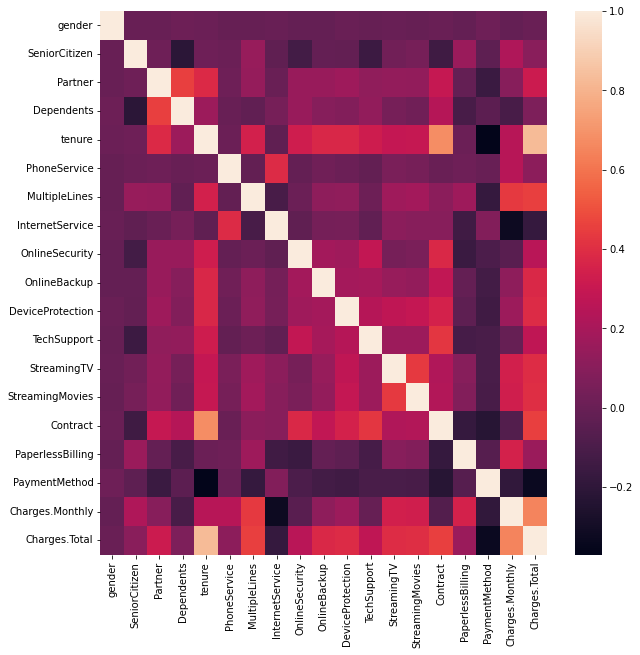

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr())

### SVC

In [20]:
from sklearn import svm
svc = svm.SVC(random_state=100)
svc.fit(X_train, Y_train)
score_svc = svc.score(X_test,Y_test)
print('score_svc:',score_svc)

score_svc: 0.7256574271499645


### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=100)
decision_tree_classifier.fit(X_train, Y_train)
score_decision_tree_classifier = decision_tree_classifier.score(X_test,Y_test)
print('score_decision_tree_classifier:',score_decision_tree_classifier)

score_decision_tree_classifier: 0.7306325515280739


### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=500,random_state=100)
random_forest_classifier.fit(X_train,Y_train)
score_random_forest_classifier = random_forest_classifier.score(X_test,Y_test)
print('score_random_forest_classifier:',score_random_forest_classifier)

score_random_forest_classifier: 0.7924662402274343


Once we got a better result using Random Forest Classifier, we may use this model to understand which caracteristics are the most important ones

In [24]:
best_characteristics = pd.DataFrame()
best_characteristics['Chars'] = X.columns
best_characteristics['Importance'] = random_forest_classifier.feature_importances_
best_characteristics.sort_values('Importance')

,Chars,Importance
5,PhoneService,0.005252
13,StreamingMovies,0.017785
12,StreamingTV,0.017986
3,Dependents,0.020020
1,SeniorCitizen,0.021013
6,MultipleLines,0.022728
2,Partner,0.023099
10,DeviceProtection,0.023917
15,PaperlessBilling,0.025916
7,InternetService,0.027225


<AxesSubplot:xlabel='Chars', ylabel='Importance'>

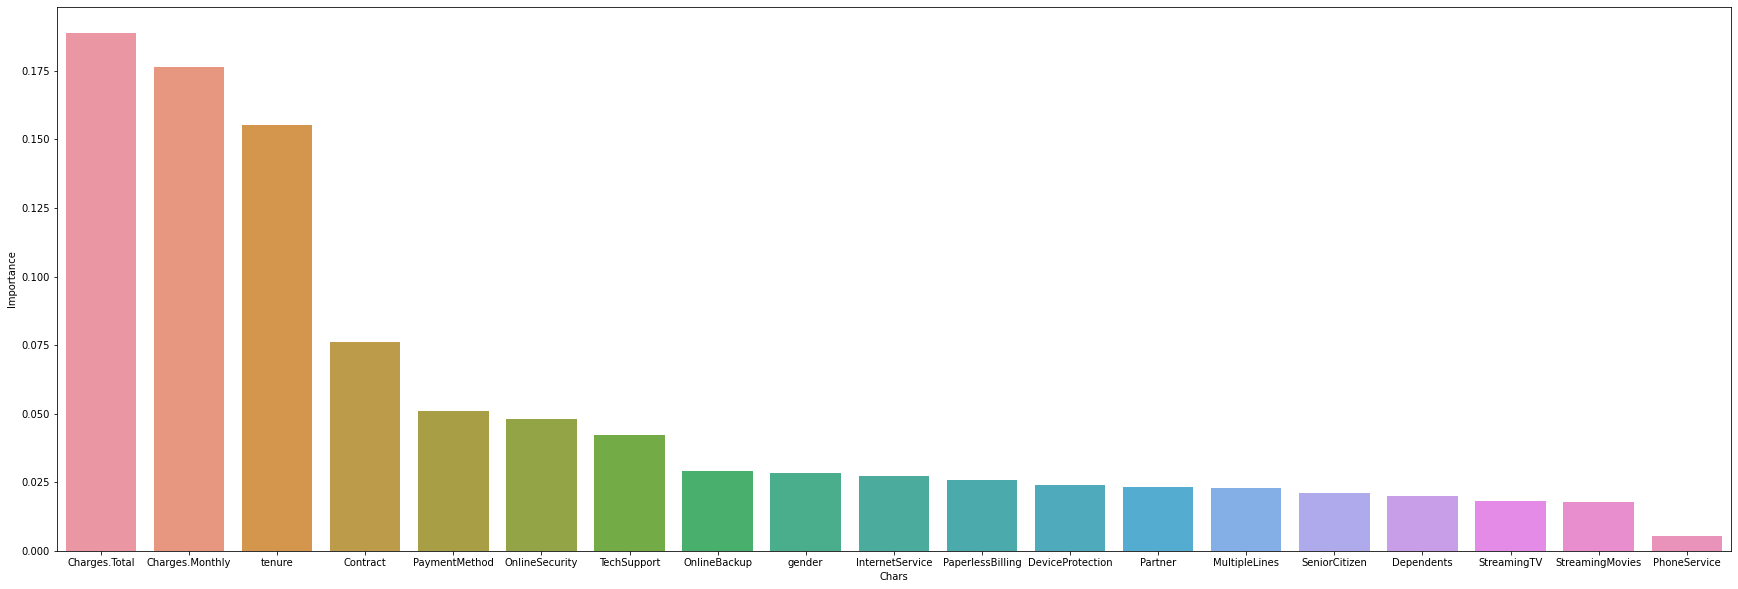

In [25]:
plt.figure(figsize=(30,10))
sns.barplot(x='Chars', y='Importance', data = best_characteristics.sort_values('Importance',ascending=False))

It's possible to see that tenure, Charges.Monthly and Charges.Total are the most important characteristics

We could try to improve our scores by reducing the number of variables that are not too relevant, like PhoneService

### Trying to reduce variables

In [67]:
# from sklearn.decomposition import PCA
# reduction = 1
# pca = PCA(n_components=len(X.columns)-reduction,random_state=100)

In [68]:
# pca.fit(X)
# X_reduction = pca.transform(X)

In [69]:
# from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, Y_train, Y_test = train_test_split(X_reduction, Y, test_size=0.2, random_state=100)
# random_forest_classifier = RandomForestClassifier(n_estimators=500,random_state=100)
# random_forest_classifier.fit(X_train,Y_train)
# score_random_forest_classifier = random_forest_classifier.score(X_test,Y_test)
# print('score_random_forest_classifier:',score_random_forest_classifier)

score_random_forest_classifier: 0.7910447761194029


In [26]:
dataframe.PhoneService.unique()

array(['Yes', 'No'], dtype=object)

In [55]:
# X_without_PhoneService = X.drop('PhoneService',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [68]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=500,random_state=100)
random_forest_classifier.fit(X_train,Y_train)
score_random_forest_classifier = random_forest_classifier.score(X_test,Y_test)
print('score_random_forest_classifier:',score_random_forest_classifier)

score_random_forest_classifier: 0.7924662402274343


In [57]:
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best","random"]
max_depth = [None,2,4,6,8,10,12,15,20]
min_samples_split = [2,6,10]
min_samples_leaf = [1,2,5]

param_grid = {
    "criterion": criterion,
    "splitter": splitter,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

decision_tree = DecisionTreeClassifier(random_state=100)
random_cv = RandomizedSearchCV(decision_tree, param_grid, n_iter=400, cv=5, n_jobs=-1, random_state = 100)

In [58]:
decision_tree_cv = random_cv.fit(X_train, Y_train)
decision_tree_cv.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'criterion': 'entropy'}

In [59]:
decision_tree_best_model = DecisionTreeClassifier(**decision_tree_cv.best_params_, random_state = 100)
decision_tree_best_model.fit(X_train,Y_train)
decision_tree_best_model.score(X_test,Y_test)

0.7846481876332623

In [65]:
criterion = ["gini", "entropy", "log_loss"]
max_depth = [None,2,4,6,8,10,12,15,20]
min_samples_split = [2,3,4,6,10]
min_samples_leaf = [1,2,5]

param_grid = {
    "criterion": criterion,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_forest = RandomForestClassifier(n_estimators=50,random_state=100)
random_cv = RandomizedSearchCV(random_forest, param_grid, n_iter=400, cv=5, n_jobs=-1, random_state = 100)

In [66]:
random_forest_cv = random_cv.fit(X_train, Y_train)
random_forest_cv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 6,
 'criterion': 'gini'}

In [67]:
random_forest_best_model = DecisionTreeClassifier(**random_forest_cv.best_params_, random_state = 100)
random_forest_best_model.fit(X_train,Y_train)
random_forest_best_model.score(X_test,Y_test)

0.7889125799573561